In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

2025-06-28 14:14:53.094174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751120093.341746      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751120093.413973      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
female_actresses = [
    "Alia Bhatt",
    "Charlize Theron",
    "Billie Eilish",
    "Jessica Alba",
    "Priyanka Chopra",
    "Natalie Portman",
    "Elizabeth Olsen",
    "Camila Cabello",
    "Courtney Cox",
    "Ellen Degeneres",
    "Margot Robbie",
    "Anushka Sharma",
    "Lisa Kudrow",
    "Claire Holt",
    "Alexandra Daddario"
]


In [3]:
os.walk('/kaggle/input/face-recognition-dataset/Original Images/Original Images')

<generator object _walk at 0x7a0f0c2f4bc0>

In [4]:
root, folder, file = next(os.walk('/kaggle/input/face-recognition-dataset/Original Images/Original Images'))
print("Root:", root)
print("Folders:", folder)
print("Files:", file)

Root: /kaggle/input/face-recognition-dataset/Original Images/Original Images
Folders: ['Alia Bhatt', 'Charlize Theron', 'Zac Efron', 'Billie Eilish', 'Jessica Alba', 'Priyanka Chopra', 'Natalie Portman', 'Hrithik Roshan', 'Tom Cruise', 'Roger Federer', 'Henry Cavill', 'Amitabh Bachchan', 'Brad Pitt', 'Dwayne Johnson', 'Kashyap', 'Elizabeth Olsen', 'Camila Cabello', 'Vijay Deverakonda', 'Courtney Cox', 'Ellen Degeneres', 'Margot Robbie', 'Anushka Sharma', 'Lisa Kudrow', 'Marmik', 'Robert Downey Jr', 'Virat Kohli', 'Claire Holt', 'Andy Samberg', 'Alexandra Daddario', 'Akshay Kumar', 'Hugh Jackman']
Files: []


In [5]:
folders = []
img_data =[]
labels =[]
persons=[]
label=0
count=0
i = 0
for root, dirs, files in os.walk('/kaggle/input/face-recognition-dataset/Original Images/Original Images'):
    i += 1
    if( i== 1):
        folders = dirs
        print('i : ', i)
        print("Root:", root)
    elif  i>0 and folders[i-2] not in female_actresses and count < 4:
        j = 0
        print("-----------------------------------------------------------")
        for file_name in files:
            j +=1
            img_path = os.path.join(Path(root), file_name)
            person = folders[i-2]
            img_data.append(img_path)
            persons.append(person)
            labels.append(label)
            
            ''' 
            if( j <= 2):
                print('i : ', i)
                print("Image Path:", img_path)
                print("Person : ", person)
                print("Label:", label)
            '''
        label+=1
        count+=1
        print(f'Loop number is : {i}')
        print(f'{person} have {j} images')

i :  1
Root: /kaggle/input/face-recognition-dataset/Original Images/Original Images
-----------------------------------------------------------
Loop number is : 4
Zac Efron have 91 images
-----------------------------------------------------------
Loop number is : 9
Hrithik Roshan have 101 images
-----------------------------------------------------------
Loop number is : 10
Tom Cruise have 58 images
-----------------------------------------------------------
Loop number is : 11
Roger Federer have 77 images


In [6]:
img_size = (224, 224)
output_unit= 4
#output_unit = len(folders)- len(female_actresses)
print('Image shape: ', img_size)
print('output shape: ', output_unit)

Image shape:  (224, 224)
output shape:  4


In [7]:
len(img_data), len(labels), len(persons)

(327, 327, 327)

In [8]:
full_dataset = list(zip(img_data, labels, persons))
random.shuffle(full_dataset)

In [9]:
img_oath, label, _ = full_dataset[0]
print("First Image Path:", img_oath)
print("First Label:", label)

First Image Path: /kaggle/input/face-recognition-dataset/Original Images/Original Images/Hrithik Roshan/Hrithik Roshan_20.jpg
First Label: 1


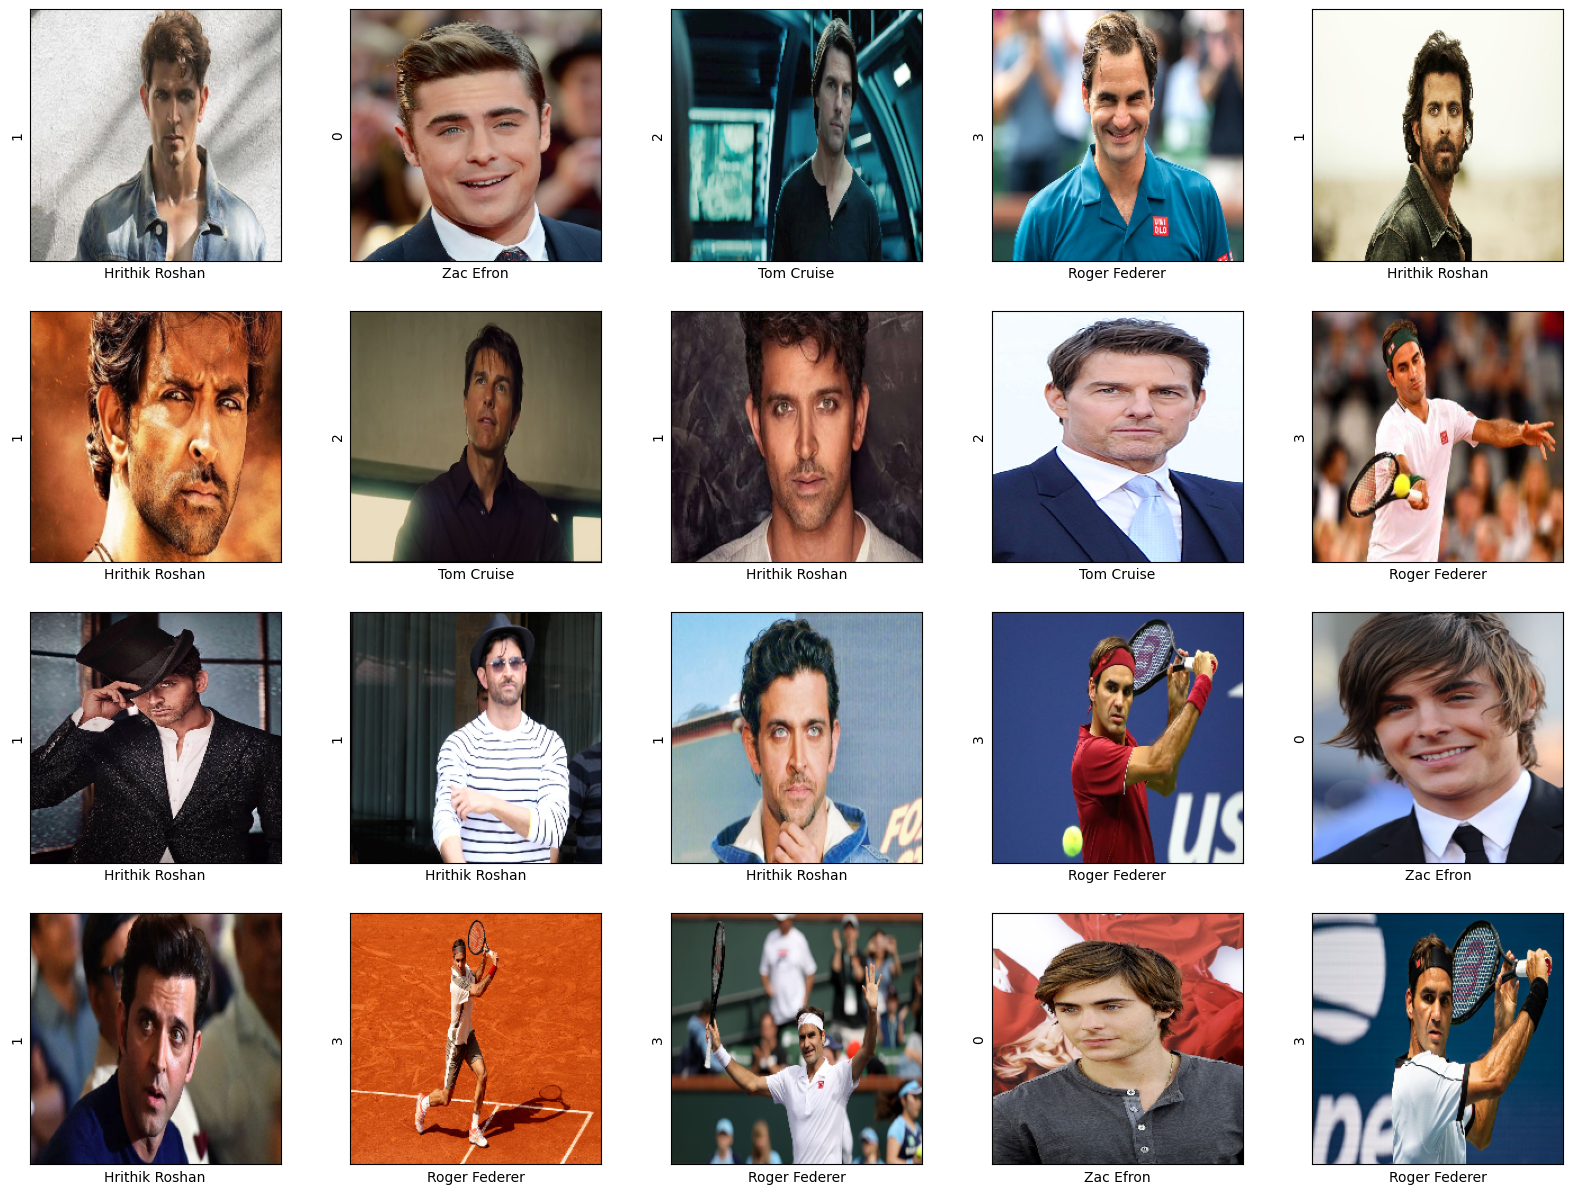

In [10]:
i = 0
plt.figure(figsize=(20,15))

for i in range(20):
    img_path, label, person = full_dataset[i]
    img_data = cv2.imread(img_path)
    img_data = cv2.resize(img_data, img_size)
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.ylabel(label)
    plt.xlabel(person)
    plt.xticks([])
    plt.yticks([])
plt.show()
    


In [11]:
img, label,_ =full_dataset[0]
print(img, label)

/kaggle/input/face-recognition-dataset/Original Images/Original Images/Hrithik Roshan/Hrithik Roshan_20.jpg 1


In [12]:
X_train = []
Y_train=[]
X_test=[]
Y_test=[]
for i in range(len(full_dataset)):
    x = round(len(full_dataset)* 0.8)
    img, label, _ = full_dataset[i]
    if( i < x):
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_train.append(img_data)
        Y_train.append(label)
    
    else:
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_test.append(img_data)
        Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1,1))

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

print("Traning image shape: ", X_train.shape)
print("Traning label shape: ", Y_train.shape)
print("Test image shape: ", X_test.shape)
print("Test label shape: ", Y_test.shape)


Traning image shape:  (262, 224, 224, 3)
Traning label shape:  (262, 1)
Test image shape:  (65, 224, 224, 3)
Test label shape:  (65, 1)


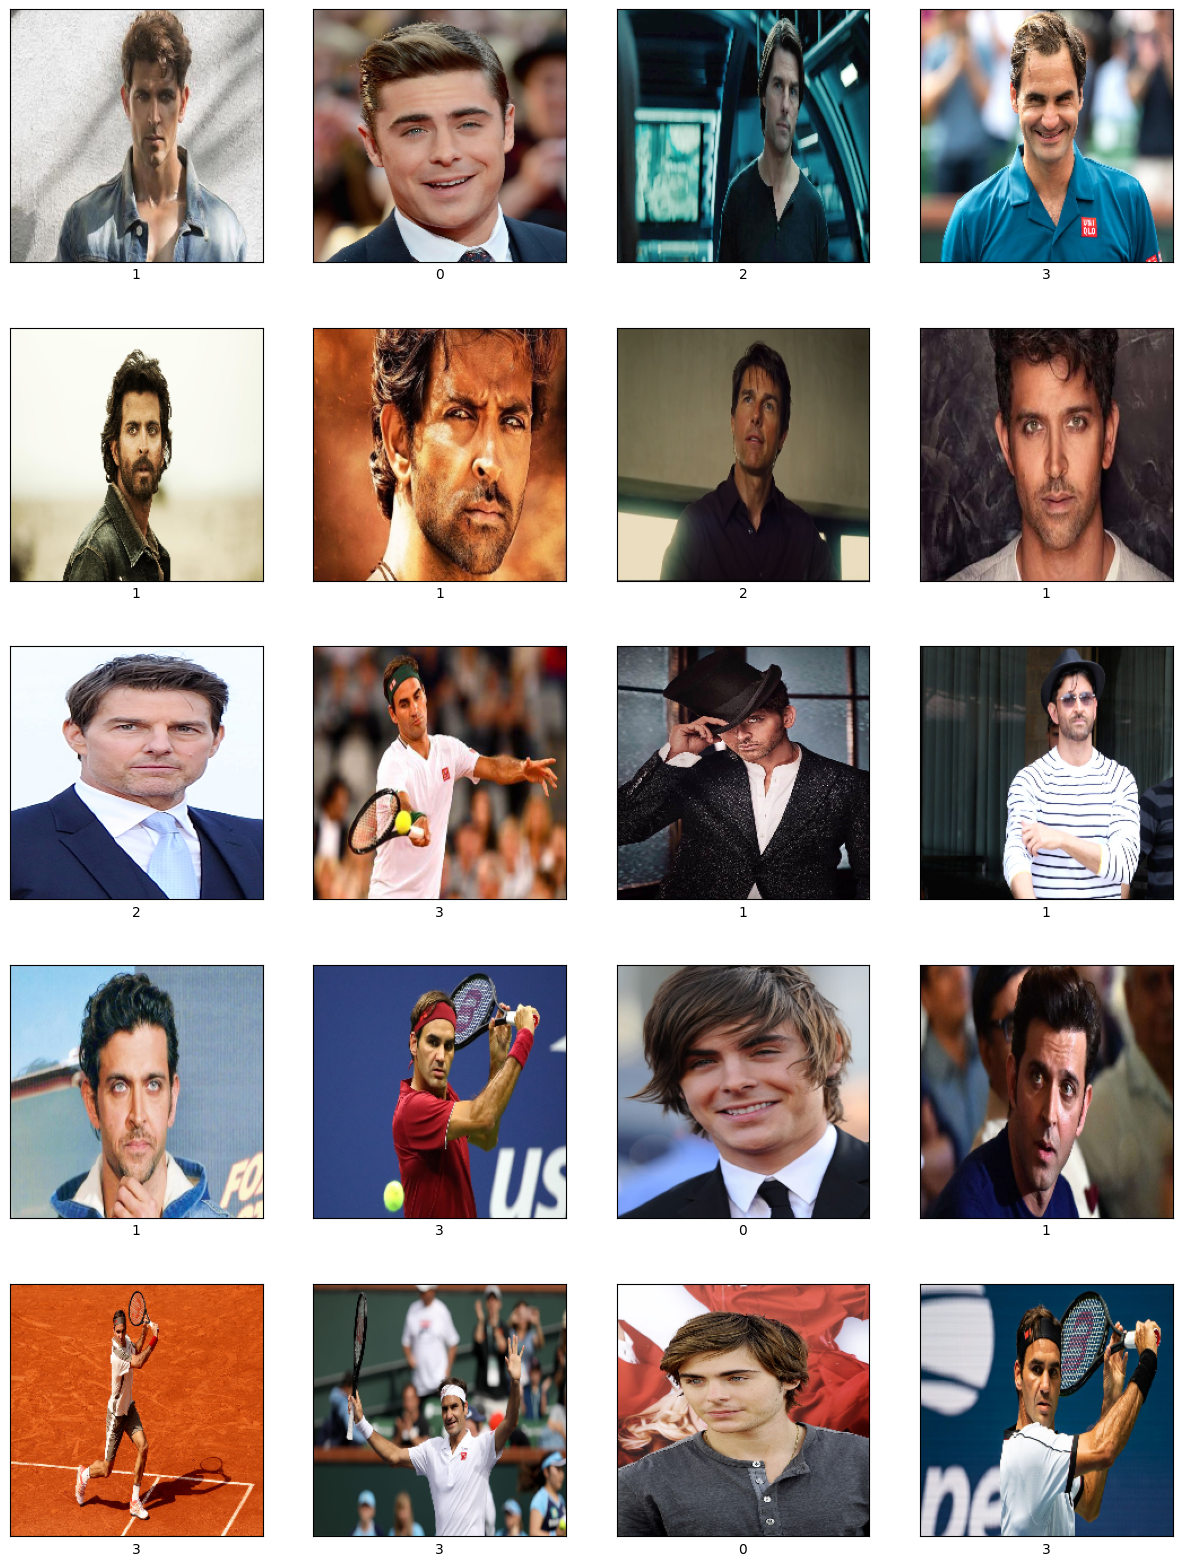

In [13]:
j= 0
plt.figure(figsize=(15,20))
for i in range(20):
    plt.subplot(5, 4,i+1)
    img = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i][0])

In [14]:
img_shape = img_size + (3, )
img_shape

(224, 224, 3)

In [15]:


# Define input shape
input_shape = X_train.shape[1:]


# Load base model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with your number of classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Summary
model.summary()


/tmp/ipykernel_19/2447555287.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
I0000 00:00:1751120123.648665      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751120123.649269      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 4,226,884 (16.12 MB)

 Trainable params: 1,968,900 (7.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=16 ,
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
I0000 00:00:1751120134.951470      66 service.cc:148] XLA service 0x7a0de4014220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751120134.952194      66 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751120134.952215      66 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751120135.916272      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2489 - loss: 3.8455

I0000 00:00:1751120141.324113      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 862ms/step - accuracy: 0.2539 - loss: 3.8400 - val_accuracy: 0.3585 - val_loss: 3.1094
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4038 - loss: 3.1470 - val_accuracy: 0.4340 - val_loss: 2.7888
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3112 - loss: 2.9138 - val_accuracy: 0.5094 - val_loss: 2.6221
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4488 - loss: 2.6208 - val_accuracy: 0.4528 - val_loss: 2.5034
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5064 - loss: 2.4076 - val_accuracy: 0.4151 - val_loss: 2.4602
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5069 - loss: 2.3704 - val_accuracy: 0.4528 - val_loss: 2.3693
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6149 - loss: 2.1093 - val_accuracy: 0.4340 - val_loss: 2.4137
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5686 - loss: 2.0726 - val_accuracy: 0.4906 - val_loss: 

In [18]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [19]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 31)

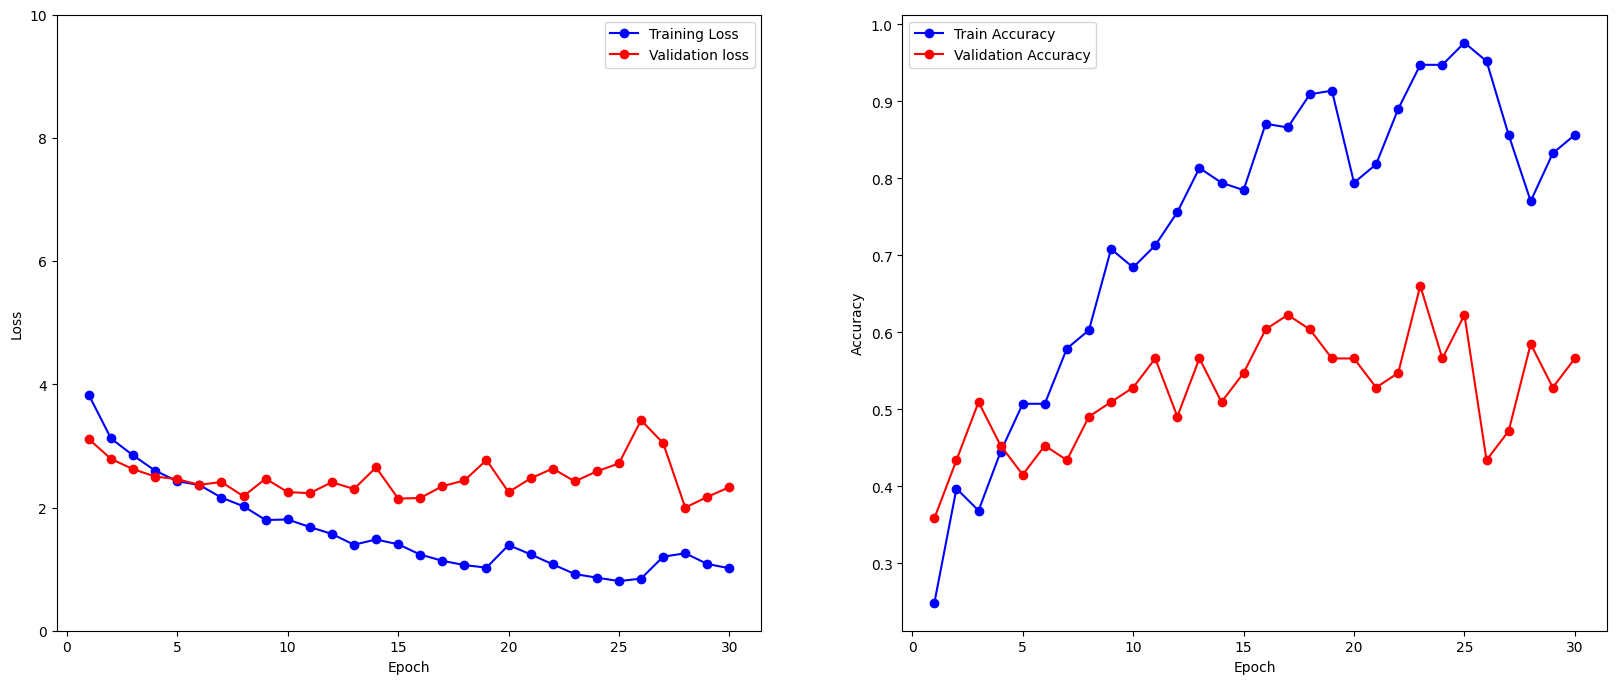

In [20]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 935ms/step - accuracy: 0.4572 - loss: 2.8651

Test Accuracy: 0.4769230782985687

Test Loss: 2.646488904953003


In [22]:
probability = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


In [23]:
(probability[0].max() *100).round(2)

98.51

In [24]:
predicted_classes = probability[0].argmax()
predicted_classes

0

In [25]:
probability[0]

array([9.8512197e-01, 1.4850156e-02, 3.9748943e-06, 2.3886398e-05],
      dtype=float32)

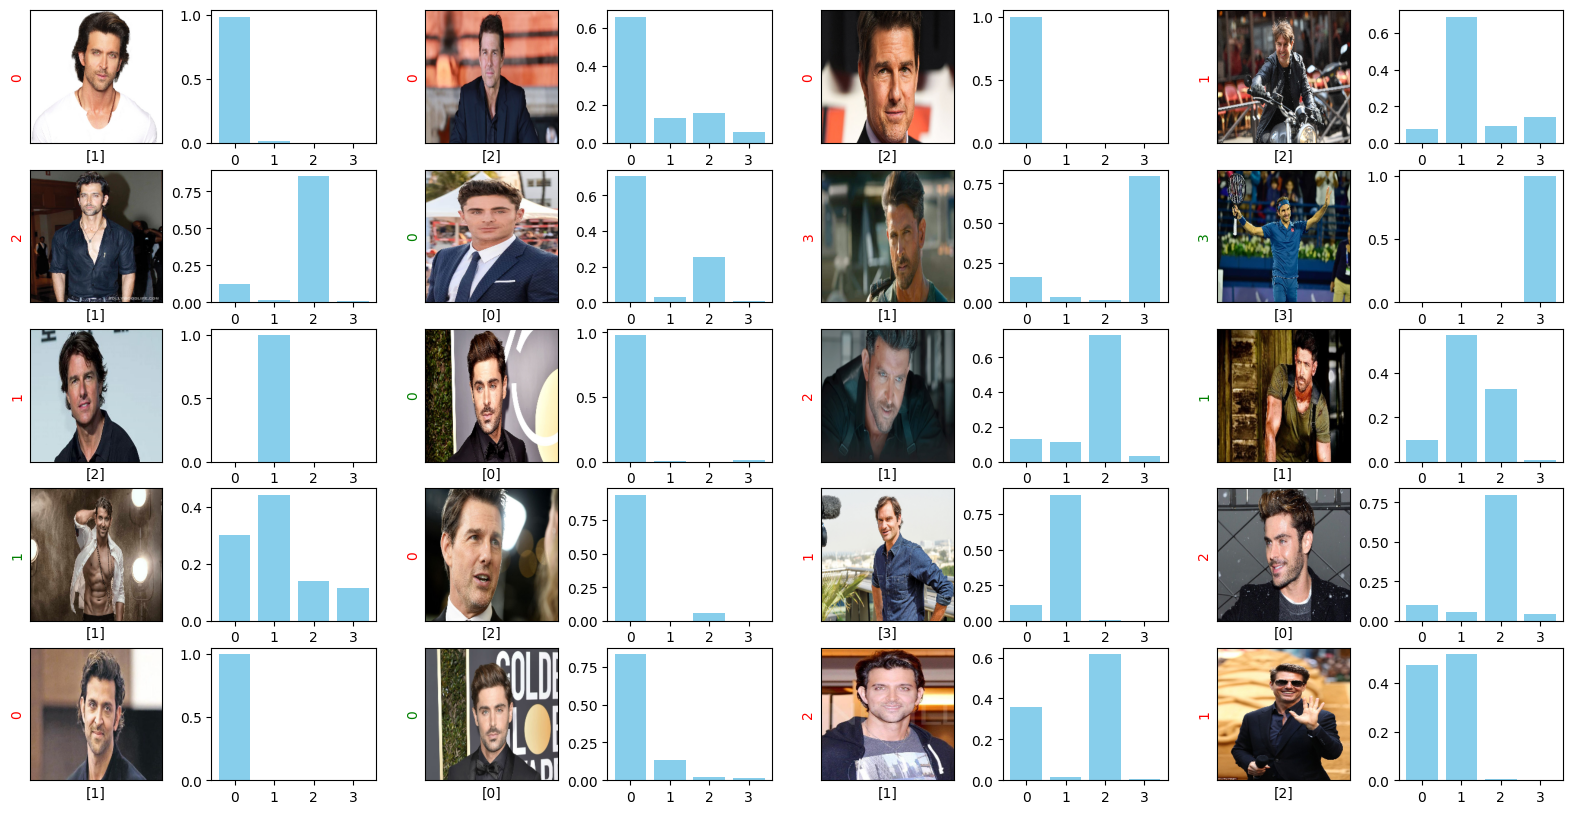

In [26]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [27]:
probability[0]

array([9.8512197e-01, 1.4850156e-02, 3.9748943e-06, 2.3886398e-05],
      dtype=float32)

In [28]:
model.save("model_MobileNet(19_5_1_1).h5")

In [29]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine_tune = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('model_MobileNet(19_5_1_1).h5', save_best_only=True, monitor='val_loss'),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
    ]
)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3753 - loss: 3.8054 - val_accuracy: 0.5472 - val_loss: 2.4305 - learning_rate: 1.0000e-05
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4233 - loss: 3.0117 - val_accuracy: 0.5660 - val_loss: 2.5378 - learning_rate: 1.0000e-05
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4883 - loss: 2.7534 - val_accuracy: 0.5660 - val_loss: 2.6586 - learning_rate: 1.0000e-05
Epoch 4/10
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4925 - loss: 2.4656
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4909 - loss: 2.4578 - val_accuracy: 0.5283 - val_loss: 2.8073 - learning_rate: 1.0000e-05
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5510 - loss: 2.2193 - val_accuracy: 0.5094 - val_loss: 2.8476 - learning_rate: 5.0000e-06
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5547 - loss: 2.2772 - val